# FitzHugh Naguno

![FritHugh-Naguno](../pics/fitz-naguno.png)
$\left\{
\begin{array}{l}
\dot{x} = x - \frac{x^3}{3} - y + R
\\
\dot{y} = \frac{1}{\tau} (x + a -b y)
\end{array}
\right.$

In [1]:
# this makes sure it starts looking for things from the top folder down.
import os
import sys
os.chdir('../')
sys.path.insert(0,os.getcwd())
print(os.getcwd())

C:\Users\rrtuc\Desktop\backed-up\python-projects\ode_to_odes


In [2]:
from ode_helpers import *

In [3]:
def f(t, y, c):
    ydot = [y[0]-y[0]**3/3 - y[1] + c[0], 
            (1/c[1])*(y[0] + c[2] - c[3]*y[1])]
    return ydot

def dx_dt(x, y):
    return f(0, (x, y), c)[0]
    
def dy_dt(x, y):
    return f(0, (x, y), c)[1]

R= .5
tau= 12.5
a= .7
b=.8
c = (R, tau, a, b)     

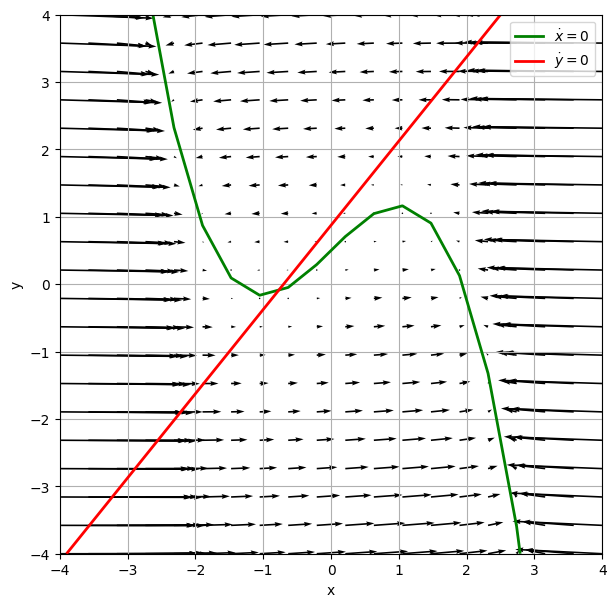

In [4]:
plot_phase_plane(dx_dt,
                 dy_dt,
                 x_range=(-4, 4),
                 y_range=(-4, 4),
                 density=20,
                 scale=10
                 # %trajectories=[(2, 0), (-2, 1), (0, -2)]
                 )

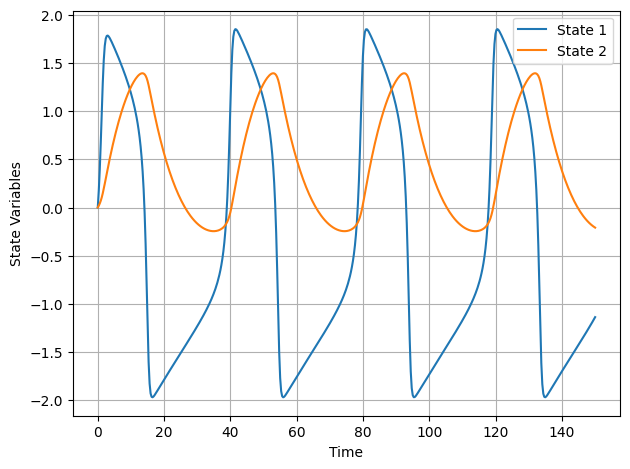

In [5]:
tspan = np.linspace(0, 150, 500)
yinit = [0, 0]
sol = solve_ivp(lambda t,
                y: f(t, y, c),
                [tspan[0], tspan[-1]],
                yinit,
                t_eval=tspan,
                rtol = 1e-5)
state_plotter(sol.t, sol.y)